In this tutorial, we will learn how to fit data using ElectroKitty. We will start by creating some synthetic data for which we will then try and guess the parameters for using ElectroKitty.

The example we will work with will be a 1e electron surface-confined reaction. To make it a challenge for ElectroKitty, let us introduce non-ideal parameters and noise to our data.

As is tradition we first import some libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from electrokitty import ElectroKitty

# Generating synthetic data

The code for this simulation is virtually the same as the one shown in the second tutorial, so let us skip some of the details. We will be adding noise, which can be conveniently added with numpy. We save the generated data in a separate lists that we will using throughout the tutorial.

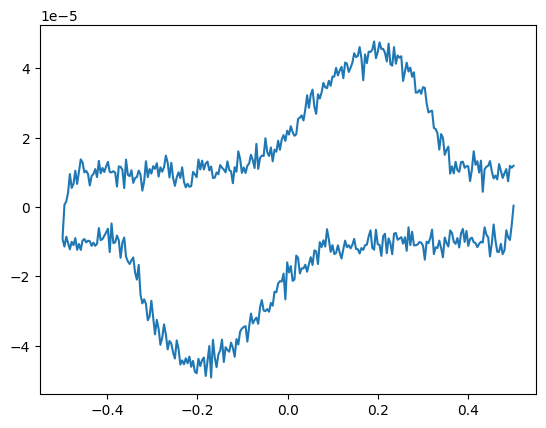

In [2]:
mechanism = "E(1): a*=b*"

kinetic_constants = [[0.5, 0.01, 0.0]]

diffusion_coef = []

initial_condition = [[10**-5, 0], []]

si = [0.001, 20, 10**-5, 0]

cell_constants = [293, 700 , 10**-4, 10**-4]

isotherm_constants = [-3, -3]

Ei = 0.5
Ef = -0.5
v = 0.1
nt = 500

simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, Ef, v, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, diffusion_coef, isotherm_constants, si, initial_condition)
simulation.simulate()

noise = np.random.normal(0, 0.05*max(simulation.current), 500) # Noise of mean 0 and a standard deviation of 5% of max(i)

E_data = simulation.E_generated # Saving the generated signal
I_data = simulation.current + noise # Adding our noise to the current
t_data = simulation.t

plt.plot(E_data, I_data)

# Fitting the data

Now that we have our data, let us try to guess the parameters used to generate it. We of course know what the simulation parameters are, so this will only serve as a way to check that ElectroKitty has done it's job correctly.

So to start off let us create a new class and import into it our generated data. If you have done the 4th tutorial this will be easy.

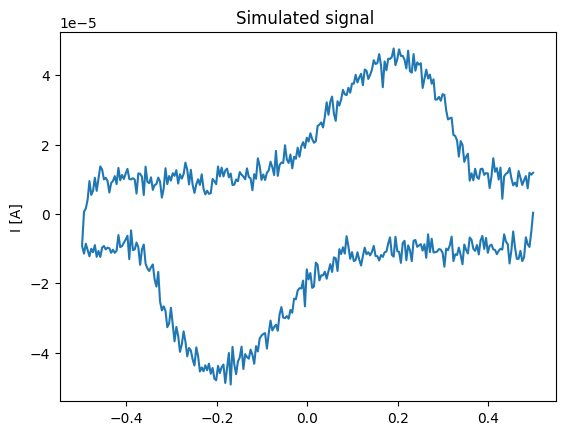

In [3]:
fit = ElectroKitty(mechanism)

fit.set_data(E_data, I_data, t_data)
fit.Plot_data() # plot the data to check that everything is ok

When we imported the data, ElectroKitty updated its internal parameters so that the simulation potential and time are the same as those in the experiment (in this case a virtual experiment, but the point still stands). ElectroKitty will use these two lists when generating the current during the optimization routine. They are also the lists it uses, if we would call the simulate function Another important note is that not all experimental data are suited for ElectroKitty. Only data that has constant time steps is suitable for simulation and fitting, so when trying to fit the data be extremely careful what kind of data you use, so as to not brick the simulator. 

I have cursed the simulator so that a kitten dies if bad data is imported...

Coming back to the tutorial. Before we fit our data, we will need to again create a simulation problem with ElectroKitty. The parameters we give it will serve as the initial guess for the fitting algorithm. At this point we should also decide which parameters we would like to fit. In short we will be fitting everything: the kinetic parameters are fitted by default, we will also choose to fit the capacitance, resistance, non-ideality parameters and the surface concentration of the initial species. We will not fit the electrode area, as we assume to know that one. So creating our guess for the data looks something like this. Also ploting both data and the initial guess...

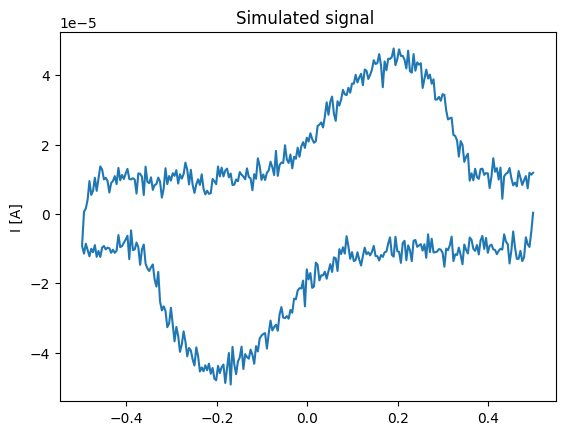

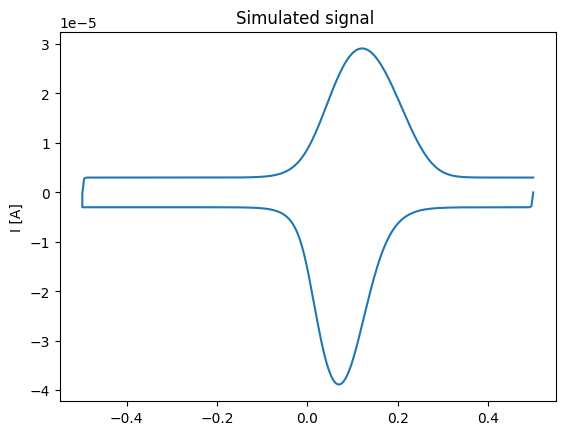

In [4]:
kinetic_constants = [[0.75, 1, 0.1]]

diffusion_coef = []

initial_condition = [[5*10**-6, 0], []]

si = [0.001, 20, 10**-5, 0]

cell_constants = [293, 100 , 3*10**-5, 10**-4]

isotherm_constants = [-1, -1]

fit.create_simulation(kinetic_constants, cell_constants, diffusion_coef, isotherm_constants, si, initial_condition)
fit.simulate()
fit.Plot_data()
fit.Plot_simulation()

We see that our initial guess is a far cry from a perfect fit to our data...

For this all we need to do is call the fit_to_data function and pass it what we would like fitted and the algorithm we would like to use (CMA-ES is recommended). In this case we call the function like so:

In [24]:
fit.fit_to_data(algorithm = "CMA-ES", fit_Cdl = True, fit_Ru = True, fit_gamamax = True, fit_iso = True)

C:\Users\ozbejv\AppData\Local\miniconda3\Lib\site-packages\cma\evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=4 at iteration 0 change by 0.03626497168998484 to stds[4]=0.0036265878325609994
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"
C:\Users\ozbejv\AppData\Local\miniconda3\Lib\site-packages\cma\evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=5 at iteration 0 change by 0.032944119442353606 to stds[5]=0.003294514896217235
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=472281, Fri Jan 31 14:35:52 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 2.173264580711430e-02 1.0e+00 8.70e-02  3e-03  9e-02 0:00.4
    2     20 3.947966909685257e-02 1.2e+00 7.95e-02  2e-03  8e-02 0:00.7
    3     30 1.162399254218126e-01 1.3e+00 8.17e-02  2e-03  8e-02 0:01.0
   16    160 2.794842547848035e-02 3.0e+00 3.60e-02  6e-04  4e-02 0:04.2
   35    350 1.390999503256530e-02 4.6e+00 3.67e-02  4e-04  5e-02 0:08.4
   58    580 1.422369144570396e-02 1.5e+01 3.45e-02  2e-04  5e-02 0:13.4
   86    860 7.919768482574243e-03 3.4e+01 1.89e-02  3e-05  3e-02 0:19.4
  100   1000 4.907388663020734e-03 6.2e+01 1.47e-02  2e-05  2e-02 0:22.4
  135   1350 4.344154396718490e-03 1.2e+02 6.86e-04  4e-07  8e-04 0:30.7
  174   1740 4.339697313826841e-03 8.5e+02 1.22e-03  3e-07  5e-03 0:39.8
  200   2000 4.318439017256391e-03 2.7e+03 4.89e-03  8e-07  4e-02 0:45.8
  248   2480 4.291933769138006e-03

Let us plot the results of our optimization...

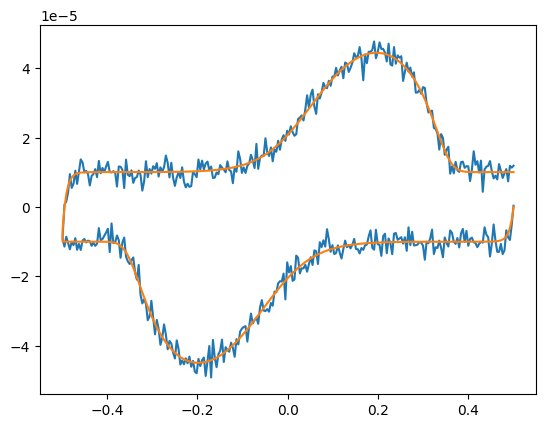

In [25]:
plt.plot(fit.E_generated, fit.I_data)
plt.plot(fit.E_generated, fit.current)

We see that our fit was successful. Next up we need to check the found parameters and see how they fit with the ones used in generating our "data". To do this we will just have to call the relevant lists in ElectroKitty and check them. 

Below we make the calls.

In [7]:
fit.isotherm

[-2.869418025672086, -3.079400337491654]

In [8]:
fit.cell_const

[293, 673.3850532881835, 0.00010032823475581057, 0.0001]

In [9]:
fit.kin

[[0.4956494402857554, 0.009990612887241238, 0.004165818355042225]]

In [10]:
fit.species_information

[[9.883544688651706e-06, 0], []]

# MCMC sampling

While the plots look good, we see that some of the parameters are not quite there. They are close to their actual values, but we see that the noise we have added to our data has really hindered our algorithm in finding the "true" parameters. 

When fitting data it is important to estimate the certainty/uncertainty one has in our parameters. Bayesian inference allows one to estimate the certainty we have in our parameters. A MCMC routine is capable of estimating the distributions of our parameters in this exercise. To be fair MCMC is much more powerful than just a "routine to estimate parameters", it can by itself find the optimal parameters given enough samples. It is thus this routine that estimates our parameters. We will also plot our markov chain and the distributions gained from it.

There are other ways of estimating parameter uncertainty, which ElectroKitty does not support, but that makes them no less valid, but Bayesian statistics does have its advantages, since interpreting the results is easy and straightforward (we just look at the histograms). However, if you see fit that some other way would be equally valid for your use case, do it! ElectroKitty just offers routines that are currently the most explored and validated, that does not make them automatically the best for your data! (Though it might take a little bit more programming...)

To run a MCMC routine with ElectroKitty we simply just need to call our function. We will tell the function to do 50000 samples and of course which parameters to sample, kinetic constants are sampled by default.

In [26]:
fit.sample_parameter_distribution(n_samples = 50000,fit_Cdl = True, fit_Ru = True, fit_iso = True, fit_gamamax = True)
# we could also change the burn_in_per parameter to tell the class how much of the chain to discrad. 
# another parameter is the n_chains, which will estimate multiple chains, which are then averaged

Starting MCMC sampling


Resolving chain num: 0

chain num: 0   iteration: 0   acceptance rate: 0.0
chain num: 0   iteration: 500   acceptance rate: 0.098
chain num: 0   iteration: 1000   acceptance rate: 0.06
chain num: 0   iteration: 1500   acceptance rate: 0.057
chain num: 0   iteration: 2000   acceptance rate: 0.07
chain num: 0   iteration: 2500   acceptance rate: 0.092
chain num: 0   iteration: 3000   acceptance rate: 0.163
chain num: 0   iteration: 3500   acceptance rate: 0.241
chain num: 0   iteration: 4000   acceptance rate: 0.305
chain num: 0   iteration: 4500   acceptance rate: 0.336
chain num: 0   iteration: 5000   acceptance rate: 0.335
chain num: 0   iteration: 5500   acceptance rate: 0.314
chain num: 0   iteration: 6000   acceptance rate: 0.293
chain num: 0   iteration: 6500   acceptance rate: 0.271
chain num: 0   iteration: 7000   acceptance rate: 0.254
chain num: 0   iteration: 7500   acceptance rate: 0.24
chain num: 0   iteration: 8000   acceptance rate: 0.227
chain nu

Plotting the mean chain...

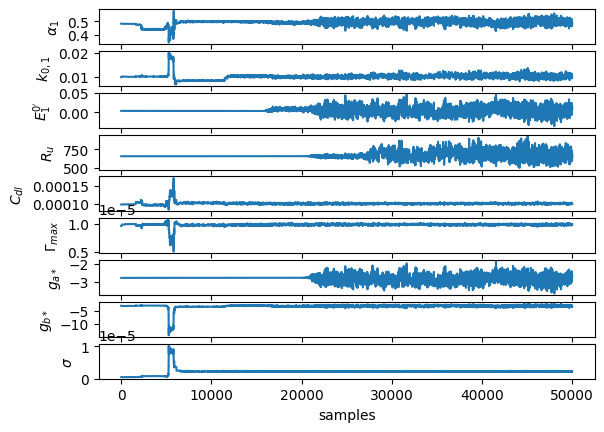

In [28]:
fit.Plot_MCMC_mean_chain()

We see that the parameters have converged, but some, for example, Ru have quite a wide range for their parameters. Again the cause of this is the large experimental noise we have introduced. There are of course other reasons for their behavior, we can see some of them by plotting the scatter plots of the parameters, from where we can see that there are some interdependencies among them

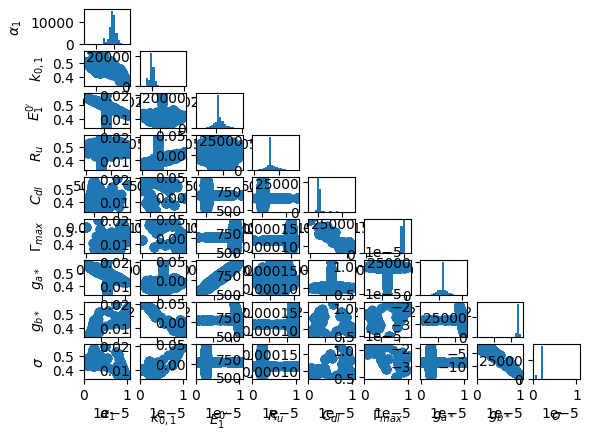

In [33]:
fit.Plot_MCMC_parameter_dist()

With this, we have concluded the 5th tutorial. These 5 tutorials cover the basics of what ElectroKitty can do by itself, without needing to extend it further. You should be able to cover most cases by just knowing how to do these basic tasks as demonstrated here. There is another tutorial, which will cover more advanced topics that mainly have to do with scripting ElectroKitty, simulating custom potentials, and integrating ElectroKitty with other packages.  